---
**Minimización del tiempo.** Un barco encalló en el punto **P** a $9 km$ del punto más próximo a la costa en línea recta. Se necesita enviar a un mensajero a un pueblo situado en la orilla de la costa a 15 km de **P**. Teniendo en cuenta que el mensajero recorre a pie $5 km/h$, y en una barca a $4 km/h$, decir en qué punto de la orilla debe desembarcar para llegar al pueblo lo más pronto posible?

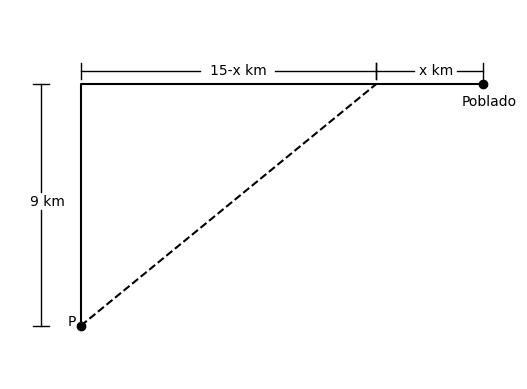

In [ ]:
import matplotlib.pyplot as plt
def dim(p1,p2,txt):
    vertical=p1[0]-p2[0]==0
    plt.plot([p1[0]-0.3*vertical,p1[0]+0.3*vertical],[p1[1]-0.3*(1-vertical),p1[1]+0.3*(1-vertical)],'k',
             [p2[0]-0.3*vertical,p2[0]+0.3*vertical],[p2[1]-0.3*(1-vertical),p2[1]+0.3*(1-vertical)],'k',
             [min(p1[0],p2[0]),(p1[0]+p2[0])/2-0.15*len(txt)*(1-vertical)],[min(p1[1],p2[1]),(p1[1]+p2[1])/2-0.2*vertical],'k',
             [max(p1[0],p2[0]),(p1[0]+p2[0])/2+0.25*len(txt)*(1-vertical)],[max(p1[1],p2[1]),(p1[1]+p2[1])/2+0.5*vertical],'k',lw=1)
    plt.text((p1[0]+p2[0])/2-len(txt)*0.1,(p1[1]+p2[1])/2-0.15*(1-vertical),txt)

plt.plot([0,0,15],[0,9,9],'k',
         [0,11],[0,9],'--k',
         [0,15],[0,9],'ok')
plt.text(-0.5,0,'P')
plt.text(14.2,8.2,'Poblado')
dim((-1.5,9),(-1.5,0),'9 km')
dim((0,9.5),(11,9.5),'15-x km')
dim((11,9.5),(15,9.5),'x km')

plt.axis('equal')
ax=plt.axis('off')

vel=Distancia/Tiempo, por lo tanto t=d/v.
Tenemos dos velocidades: a pie 5 kmh
y en barca 4 km/h

**Deducción del criterio de optimización**

Se desea minimizar el tiempo en función de las distancias y velocidades conocidas:
$$ \min_x t=\min_x \frac{d_1}{v_1}+\frac{x}{v_2}, $$
donde $d_1$ es la distancia recorrida en balsa a una velocidad $v_1=4\;\mathrm{km/h}$, además, se sabe que la distancia recorrida a pie fue a velocidad $v_2=5\;\mathrm{km/h}$, sustituyendo la distancia en balsa, a través del teorema de Pitágoras, obrenemos:
$$ \min_x\left(\frac{\sqrt{9^2+(15-x)^2}}{4}+\frac{x}{5}\right),$$
para $0\leq x \leq 15$.

In [ ]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x=sym.var('x',real=True,nonnegative=True)
def t(x):
  return ((9**2+(15-x)**2)**0.5/4)+x/5

dt=sym.diff(t(x),x)
c=sym.solve(dt,x)
c

[3.00000000000000]

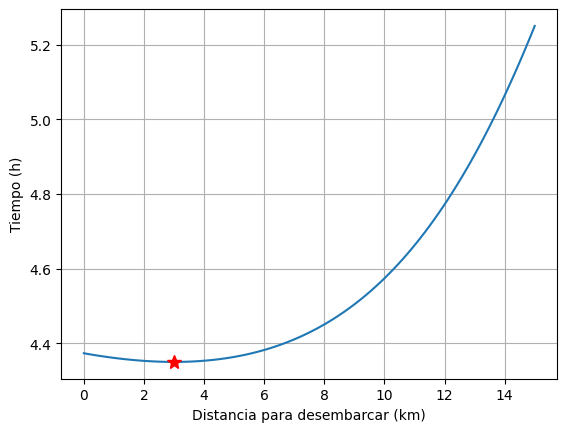

In [ ]:
#Grafico para comprobar que sea un mínimo:
x_num=np.linspace(0,15,100)
plt.plot(x_num,t(x_num))
plt.plot(c[0],t(c[0]),'r*',ms=10)
plt.ylabel('Tiempo (h)')
plt.xlabel('Distancia para desembarcar (km)')
plt.grid()

In [ ]:
#Ahora sabemos que para un tiempo mínimo tiene que desembarcar a 3 km del poblado,
#pero en cuánto tiempo lo hace?
t(c[0])

4.35000000000000

**Resultado**

Para llegar lo más pronto posible, el mensajero debe desembarcar a $3\;\mathrm{km}$ del poblado, y llegará en $4.35\;\mathrm{h}$.

In [ ]:
#Con este método puedo resolver con distintas variables

## NUEVO TEMA:
 # $PROGRAMACIÓN \; LINEAL$


#**Completar apunte con clase grabada**

### 2.2. Ejemplo básico 2
Una  fábrica  de  carrocerías  de  automóviles  y camiones  tiene  dos naves.

+ En  la nave A,  para  hacer  la  carrocería  de  un  camión,  se  invierten  siete  días-operario,  para  fabricar  la  de  un  coche  se  precisan dos días-operario.

+ En la nave B se invierten tres días operario tanto en carrocerías de camión como de coche.

Por limitaciones de mano de obra y maquinaria, la nave A dispone de $300$ días operario, y la nave B de $270$ días-operario.

Si los beneficios que se obtienen por cada camión son de $600$ u.m y por  cada  automóvil  $200$ u.m,  ¿cuántas  unidades  de  cada  uno  se deben  producir  para maximizar las  ganancias?

**Nota:** el problema $\max_{\boldsymbol{x}}\boldsymbol{g}(\boldsymbol{x})$ es equivalente a $\min_{\boldsymbol{x}}-\boldsymbol{g}(\boldsymbol{x})$.

**Solución**

*Paso 1:* Se desea maximizar la ganancia. Los datos requeridos para ello son:
* Se obtiene 600 u.m. por carrocería de camión
* Se obtiene 200 u.m. por carrocería de automóvil

*Paso 2:* Se definen las variables como:
* $x_C$: Unidades de carrocería de camión
* $x_A$: Unidades de carrocería de automóvil

In [1]:
#Paso 3: Criterio de optimización
#
def ganancia(xC,xA):
  return 600*xC+200*xA

*Paso 4:* Restricciones
> ¿Qué impide que los variables $x_C$ y $x_A$ tiendan a infinito para conseguir ganancia infinita?
* Días operarios para la nave **A**: $7x_C+2x_A\leq300$
* Días operarios para la nave **B**: $3x_C+3x_A\leq270$


In [3]:
def operarioA(xA):
  #despejo xC para xA:
  xC=(300-2*xA)/7
  return xC

def operarioB(xA):
  xC=(270-3*xA)/3
  return xC

In [4]:
import numpy as np
import matplotlib.pyplot as plt

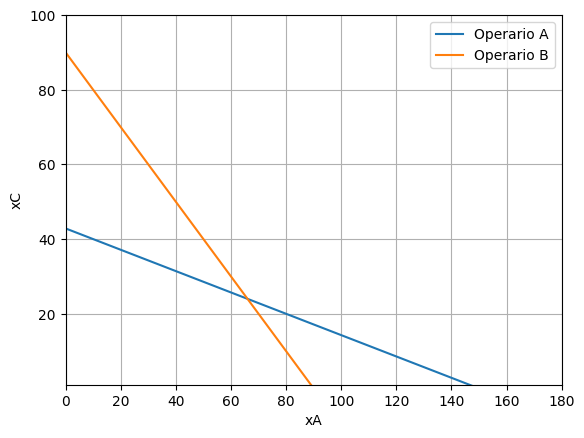

In [10]:
#Método gráfico
xA=np.linspace(0,200,100)
plt.plot(xA,operarioA(xA),label='Operario A')
plt.plot(xA,operarioB(xA),label='Operario B')
plt.legend()
plt.ylim(1,100)
plt.xlim(0,180)
plt.xlabel('xA')
plt.ylabel('xC')
plt.grid()

In [11]:
#Ambas se satisfacen en el primer cuadrante (hasta 90,45 ish {x,y}) y debo encontrarme lo más lejos del cero posible

La solución debe cumplir las siguientes condiciones:
1. Satisfacer los días operario: La solución debe estar por debajo de ambas líneas.
2. Alejarse lo más posible de cero: Para maximizar la ganancia, los puntos a comparar con el criterio de optimización son:
  1. $x_A=0$ para la restricción de la nave **A**
  2. El crice de ambas restricciones
  3. $x_C=0$ para la restricción de la nave **B**

In [13]:
#Punto 1
operarioA(0)

42.857142857142854

In [14]:
#El valor más cercano sería 43, pero 43 ya no satisface la restricción. Por lo tanto, usamos 42:
ganancia(42,0)

25200

In [15]:
import sympy as sym

In [17]:
#Punto 2:
xA=sym.Symbol('xA')
sym.solve(operarioA(xA)-operarioB(xA),xA) #busco solución para 'xA'

[66]

In [20]:
#Como obtuve 66, busco la solución para xC:
operarioA(66)

24.0

In [21]:
#saco la ganancia de xC,xA:
ganancia(24,66)

27600

In [23]:
#Punto 3:
sym.solve(operarioB(xA),xA) #Solución para xA

[90]

In [24]:
operarioB(90) #Escogimos el punto xC=0

0.0

In [25]:
ganancia(0,90)

18000

**Resultado**
La ganancia máxima es 27600 u.m. y se consigue fabricando 24 carrocerías de camión y 66 de automóvil.
___

## 3. ¿Cómo se resuelve en python?

### 3.1 Librería `SciPy`

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://scipy.org/images/logo.svg" width="200px" height="75px" />

`SciPy` es un software de código abierto basado en `Python` para matemáticas, ciencia e ingeniería.

La **Librería `SciPy`** es uno de los paquetes principales y provee varias rutinas numéricas eficientes. Entre ellas, para integración numérica y optimización.

En esta clase, y en lo que resta del módulo, estaremos utilizando el módulo `optimize` de la librería `SciPy`.

**Importémoslo**

In [26]:
import scipy.optimize as opt

El módulo `optimize` que acabamos de importar contiene varias funciones para optimización y búsqueda de raices. Entre ellas se encuentra la función `linprog`

---

In [27]:
#Linprog criterio de optimización lineal sin restricciones

In [28]:
opt.linprog?

### 3.2 Solución del ejemplo básico con linprog
Ya hicimos la solución gráfica. Contrastemos con la solución que nos da `linprog`

El problema puede ser expresado en la forma explicada como:
\begin{equation}
\begin{array}{ll}
\min_{x_A,x_B} & 0.6x_A+0.2x_B \\
\text{s. a. }  & -0.3x_A-0.05x_B\leq -25 \\
               & -0.01x_A-0.07x_B\leq -6 \\
               & -0.1x_A-0.1x_B\leq -30,
\end{array}
\end{equation}

O de forma equivalente:

- $\boldsymbol{c}=\left[0.6 \quad 0.2\right]^\top$,
- $\boldsymbol{A}=\left[\begin{array}{cc}-0.3 & -0.05 \\ -0.01 & -0.07\\ -0.1 & -0.1\end{array}\right]$, y
- $\boldsymbol{b}=\left[-25 \quad -6\quad -30\right]^\top$.

In [35]:
#Criterio de optimización:
c=np.array([0.6,0.2]) #coeficientes positivos para minimizar
#restricciones
#
A=np.array([[-0.3,-0.05], #proteínas, coeficientes negativos para restricciones con signo >=
            [-0.01,-0.07], #grasas
            [-0.1,-0.1]]) #azúcares
b=np.array([-25,-6,-30]) #Límites, mismo signo que el renglón correspondiente

In [36]:
opt.linprog(c,A,b)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 76.0
              x: [ 4.000e+01  2.600e+02]
            nit: 2
          lower:  residual: [ 4.000e+01  2.600e+02]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  1.260e+01  0.000e+00]
                 marginals: [-1.600e+00 -0.000e+00 -1.200e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

`linprog`nos regresa un objeto con diferentes atributos:
* `fun`: Criterio minimizado. Resultado de evaluar los coeficientes de `c` en las variables optimizadas.
* `x`: Las variables optimizadas en el odren aasignado desde los coeficientes de `c`
* `ineqlin.residual`: son los excedentes de las restricciones (en el mismo orden que los renglones de `A` y de `b`).

Esto es, el costo mínimo es de 76 u.m. y se consigue con 40 g del producto **A** y 260 g del producto **B**, con un excedente en grasa de 12.6 g.

___

**Para el problema de las carrocerías:**

In [43]:
c=np.array([-600,-200]) #Coeficientes negativos para Maximizar. xC, xA
A=np.array([[7,2],[3,3]]) #Nave A. Coeficientes positivos para signo <=, Nave B
b=np.array([300,270])

opt.linprog(c,A,b)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -27600.0
              x: [ 2.400e+01  6.600e+01]
            nit: 2
          lower:  residual: [ 2.400e+01  6.600e+01]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00]
                 marginals: [-8.000e+01 -1.333e+01]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

**Resultado**:
La ganancia máxima es de 27600 u.m. y se consigue con 24 unidades de carrocería de camión y 66 de automóvil.
___